#Converts polygons to pixels

In [1]:
#Imports
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
json_filename = 'train_annotations.json'
read_file = open(json_filename, "r") 
data = json.load(read_file)

annotations = {}
#[f"train_{index}.tif"]
#print((data["images"][0]))
for index, image in enumerate(data["images"]):
    polys=[]
    for polygons in image["annotations"]:
        geom = np.array(polygons['segmentation'])
        polys.append((polygons["class"],geom))
    annotations[data["images"][index]["file_name"]]=polys
print(f"Number of annotations:{len(annotations)}")


Number of annotations:176


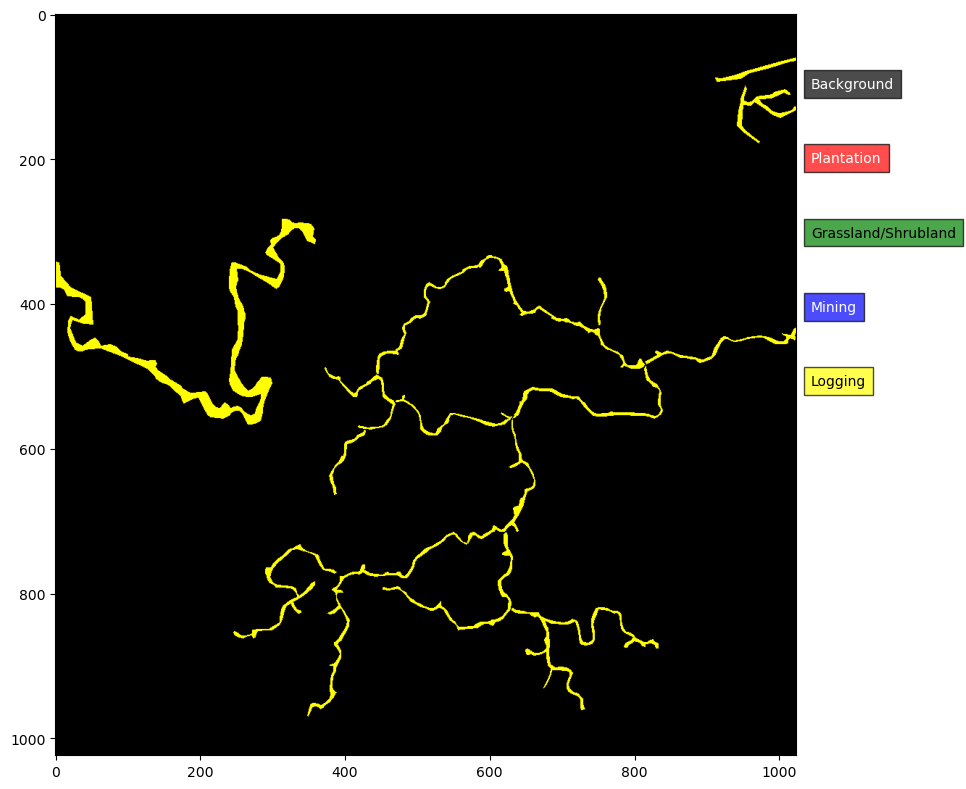

In [6]:
#Test mask
#number of pictures
n = 176
shape = (1024, 1024)
raster_imgs={}
annotation_color_allocation = {
    'plantation' : (255, 0, 0), #red
    'grassland_shrubland' : (0, 255, 0), #green
    'mining' : (0, 0, 255), #blue
    'logging' : (255, 255, 0), #yellow
}  
for current_image in range(n):
    Image.MAX_IMAGE_PIXELS = None
    img = Image.new('RGB', (shape[1], shape[0]), (0, 0, 0))  # (w, h)

    for i in range(len(annotations[f"train_{current_image}.tif"])):

        poly = annotations[f"train_{current_image}.tif"][i][1]
        type_deforest= annotations[f"train_{current_image}.tif"][i][0]

        points = list(zip(poly[::2], poly[1::2]))
        points = [(x, y) for x, y in points]
        
        color = annotation_color_allocation[type_deforest]
        ImageDraw.Draw(img).polygon(points, outline=i + 1, fill=color)
    mask_2 = np.array(img)
    raster_imgs[f"train_{current_image}.tif"]=mask_2

for i in range(174, 175):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    plt.imshow(raster_imgs[f"train_{i}.tif"])

   # Add padding around the actual image
    plt.subplots_adjust(right=0.85)
    
    # Create legend text in whitespace
    legend_x = 1.02  # Position outside of image
    legend_items = {
        'Background': 'black',
        'Plantation': 'red',
        'Grassland/Shrubland': 'green',
        'Mining': 'blue',
        'Logging': 'yellow'
    }
    
    # Add legend items with consistent spacing
    for idx, (label, color) in enumerate(legend_items.items()):
        y_pos = 0.9 - (idx * 0.1)  # Start from top with even spacing
        plt.text(legend_x, y_pos, f'{label}', 
                transform=ax.transAxes,
                bbox=dict(facecolor=color, alpha=0.7, pad=5),
                color='white' if color in ['black', 'blue', 'red'] else 'black')

    plt.tight_layout()
